In [109]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd

#Set initial map variables: Number of sources, grid size
numsamples=1000
grid_size=100




[29.71426543845529, 33.57510132739171, 79.07802403069446, 48.17776190457528, 59.46495954643937, 76.02779712322777, 96.27191054383292, 14.220658507640582, 32.96698322534789, 98.53301181086653, 64.6402564224513, 21.445460989927145, 5.605109688888721, 56.769767596582234, 85.81503534099402, 32.03420965784534, 90.7060320885924, 90.5742126762953, 66.8515987109942, 15.650360973572718, 45.61794205326953, 60.8950221260956, 51.13940589406032, 59.1417131402007, 11.177170003652282, 65.88757405660101, 51.77085828742807, 24.317401258637737, 73.69376477314552, 83.93469071649781, 52.18852249407858, 80.90774352418819, 80.89050117110594, 80.27658320281543, 71.87671575599731, 71.27660265664562, 0.3051020633687562, 90.68722702300818, 99.01854413422723, 82.56290240960132, 41.844734154026796, 27.470305043373756, 40.737776925656235, 37.15175105442524, 51.971953915763024, 13.72798710205021, 55.986676792416326, 51.69485838649975, 78.9926191398541, 38.91254008759601, 20.32792399312192, 73.45035712688849, 22.484

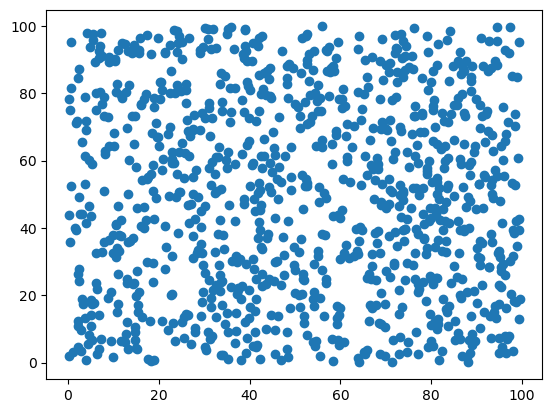

In [110]:
#Simulate parameters of each source. 

#Randomly generate x and y coordinates
xcoord=[]
ycoord=[]

for i in range (numsamples):
    x=np.random.uniform(0, grid_size)
    y=np.random.uniform(0, grid_size)
    xcoord.append(x)
    ycoord.append(y)
plt.scatter(xcoord,ycoord)


print(xcoord)


-0.03693642834824769


(array([ 3.,  0.,  0.,  1.,  1.,  4.,  1.,  3.,  1.,  7.,  5., 12., 19.,
        18., 17., 27., 35., 34., 42., 32., 39., 45., 44., 57., 51., 50.,
        51., 49., 48., 45., 43., 41., 33., 29., 17., 14., 13., 14., 12.,
        12.,  8.,  2.,  5.,  4.,  2.,  2.,  1.,  2.,  4.,  1.]),
 array([-3.29912023, -3.16753291, -3.0359456 , -2.90435829, -2.77277097,
        -2.64118366, -2.50959635, -2.37800903, -2.24642172, -2.11483441,
        -1.9832471 , -1.85165978, -1.72007247, -1.58848516, -1.45689784,
        -1.32531053, -1.19372322, -1.0621359 , -0.93054859, -0.79896128,
        -0.66737396, -0.53578665, -0.40419934, -0.27261203, -0.14102471,
        -0.0094374 ,  0.12214991,  0.25373723,  0.38532454,  0.51691185,
         0.64849917,  0.78008648,  0.91167379,  1.0432611 ,  1.17484842,
         1.30643573,  1.43802304,  1.56961036,  1.70119767,  1.83278498,
         1.9643723 ,  2.09595961,  2.22754692,  2.35913424,  2.49072155,
         2.62230886,  2.75389617,  2.88548349,  3.0170708 ,

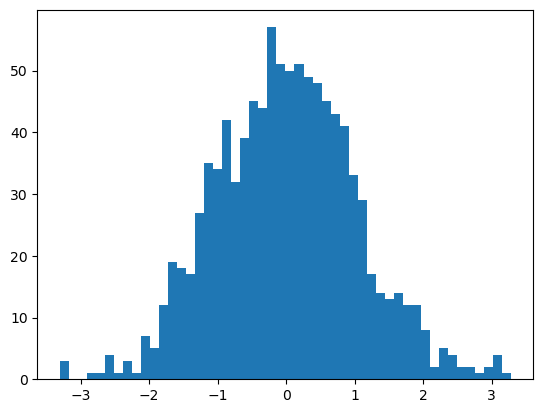

In [111]:
#Randomly sample colors from Gaussian
#Color=log_10(Flux1/Flux2)

colors = np.random.normal(loc=0, scale=1, size=numsamples)
#print(colors)
print(colors[0])
plt.hist(colors, bins=50)

[  56.54683428   68.4700646    98.67752644   69.36089983  336.75010968
   68.34221863   98.52887572   63.2769155    86.8311213   444.48819952
  133.40942956   65.57380211   60.75576221   88.92906545   65.72759307
   71.60813285  200.05118526  143.01984022  122.5323383    69.67700834
   78.49331811  136.4878054    55.62739308   50.37344282   82.36123132
   54.51250876  102.55747548   61.55374284   64.17086889   89.21627231
  121.52962548  376.53038167  114.06610797   56.21622855   96.7318461
   51.27046318   86.74917894   85.8820814   267.46322874  121.71073003
   56.12724523   78.21598278  176.0071746    53.45701078  236.36922132
   57.64171552   68.2663969    86.409591     68.32648434   78.92322131
  110.19422548  428.57846178  188.73776706  124.90868134   54.42170395
   98.27312953   80.30304529   56.08285789   52.05909141   64.07213841
  473.56336195   68.11767088   90.17511641   71.24619564  106.90064321
   81.50573814   74.06983571   90.24197785   67.5015614    79.7481012
   61.22

Text(0.5, 1.0, 'Fluxes')

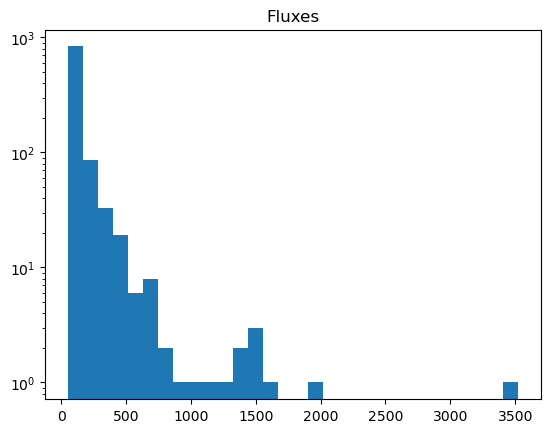

In [112]:
#Generating Flux values
#dN/dF scales by F^-5/2

def sample_flux(n_samples, F_min=1.0, F=100.0, alpha=2.5):
    u = np.random.uniform(0, 1, n_samples)
    exponent = alpha - 1
    return ( (u * (F**(-exponent) - F_min**(-exponent)) + F_min**(-exponent)) )**(-1 / exponent)

fluxes = 50*sample_flux(numsamples)
fluxes2=fluxes*(10**colors)

print(fluxes)
plt.hist(fluxes, bins=30)
plt.yscale("log")
#plt.xscale('log')
plt.title("Fluxes")



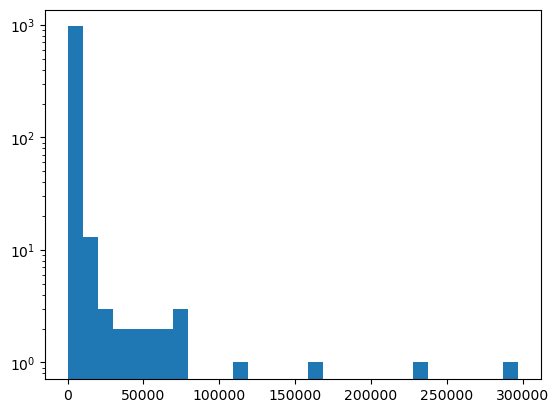

In [113]:
plt.hist(fluxes2, bins=30)
plt.yscale('log')

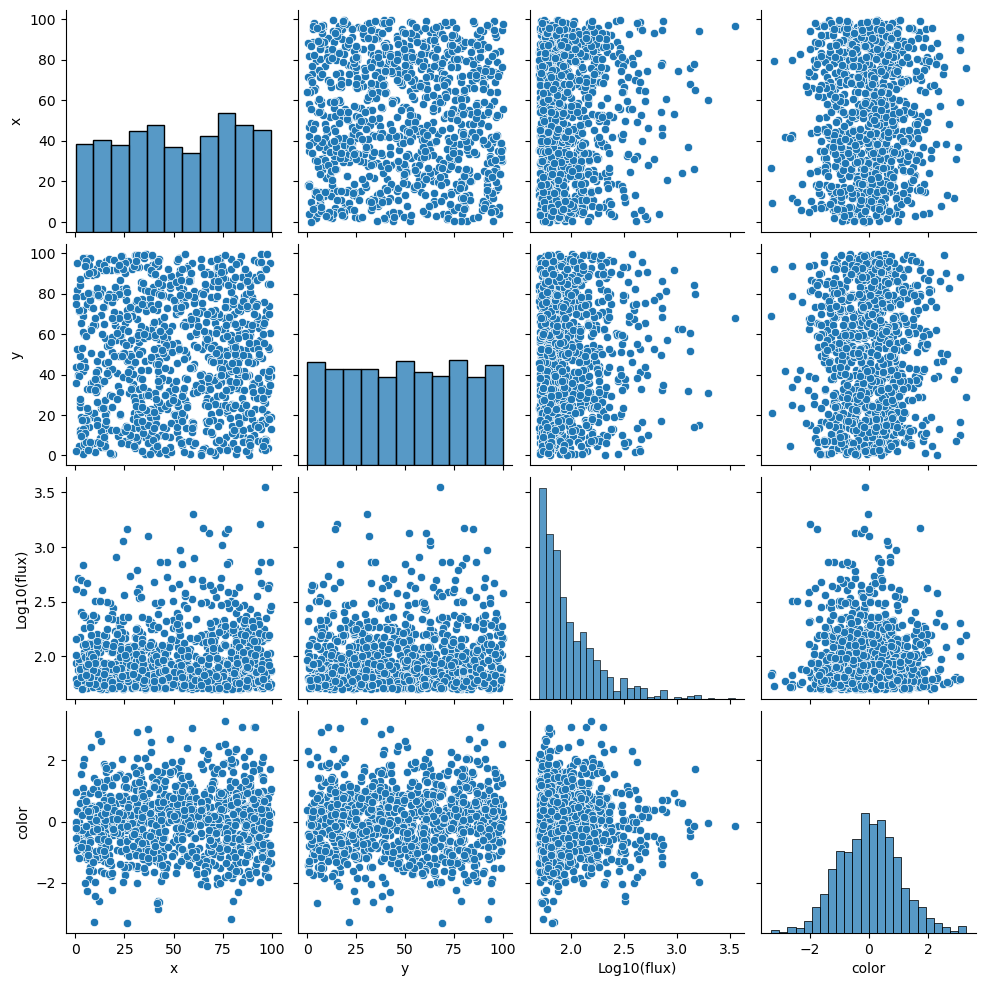

In [114]:
#Produce corner plot. This shows any relevant relationships between variables
data = pd.DataFrame({'x': xcoord, 'y': ycoord, 'Log10(flux)': np.log10(fluxes), 'color': colors})
sns.pairplot(data)
plt.show()

[[50 50 50 ... 50 50 50]
 [50 50 50 ... 50 50 50]
 [50 50 50 ... 50 50 50]
 ...
 [50 50 50 ... 50 50 50]
 [50 50 50 ... 50 50 50]
 [50 50 50 ... 50 50 50]]


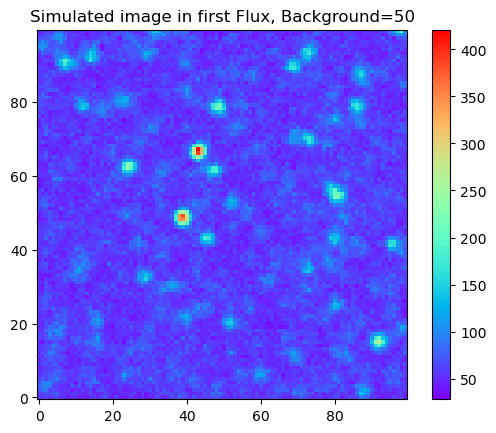

In [225]:
#Simulating Images
def simimage (x, y, f, background=50, fwhm=3):

    background_level = background
    background = np.full((grid_size, grid_size), background_level)
    print(background)

    fwhm = fwhm
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))

    #Taken from HW3
    source_counts = np.zeros((grid_size, grid_size))
    for xc, yc, flux in zip(x, y, f):
        gaussx, gaussy = np.meshgrid(np.arange(grid_size), np.arange(grid_size))
        gaussian_psf = np.exp(-((gaussx - xc) ** 2 + (gaussy - yc) ** 2) / (2 * sigma ** 2))
        gaussian_psf /= gaussian_psf.sum()

        source_counts += flux * gaussian_psf
    mean_counts = background + source_counts
    return mean_counts
mean=simimage(xcoord, ycoord, fluxes)
simulated_image1 = np.random.poisson(mean)

plt.imshow(simulated_image1, cmap='rainbow', origin='lower')
plt.colorbar(label="")
#plt.scatter(xcoord, ycoord, marker='x', color='red')

plt.title("Simulated image in first Flux, Background=50")
plt.axis("on")
plt.show()

[[50 50 50 ... 50 50 50]
 [50 50 50 ... 50 50 50]
 [50 50 50 ... 50 50 50]
 ...
 [50 50 50 ... 50 50 50]
 [50 50 50 ... 50 50 50]
 [50 50 50 ... 50 50 50]]


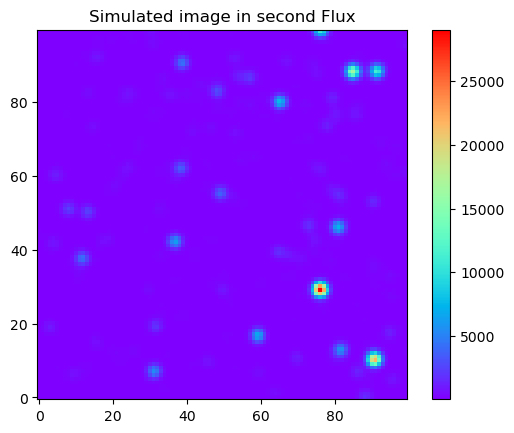

In [226]:
mean2=simimage(xcoord, ycoord, fluxes2)
simulated_image2 = np.random.poisson(mean2)

#plt.scatter(xcoord, ycoord, marker='x', color='red')

plt.imshow(simulated_image2, cmap='rainbow', origin='lower')
plt.colorbar(label="")
plt.title("Simulated image in second Flux")
plt.axis("on")
plt.show()

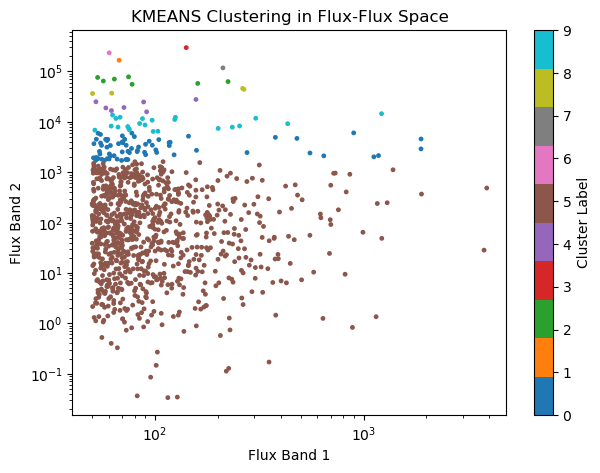

In [229]:
#Clustering using KMeans
from sklearn.cluster import KMeans


cluster = np.vstack([fluxes, fluxes2]).T

kmeans = KMeans(n_clusters=10, random_state=0)
labels = kmeans.fit_predict(cluster)

plt.figure(figsize=(7, 5))
plt.scatter(cluster[:, 0], cluster[:, 1], c=labels, cmap='tab10', s=6)
plt.xlabel("Flux Band 1")
plt.ylabel("Flux Band 2")
plt.yscale('log')
plt.xscale('log')
#plt.xlim(100,200)
plt.title("KMEANS Clustering in Flux-Flux Space")
plt.colorbar(label="Cluster Label")
plt.show()

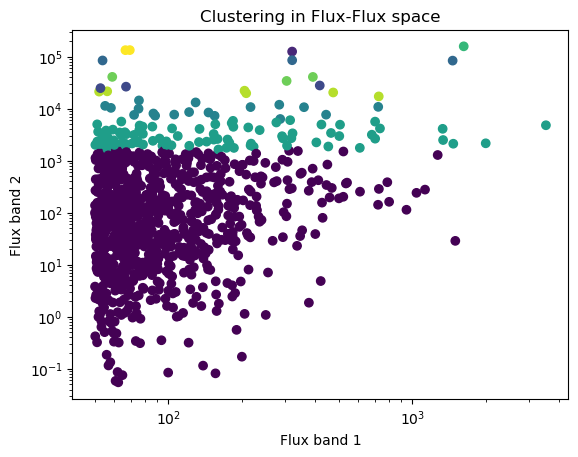

In [118]:
from sklearn.cluster import KMeans

flux_band1 = fluxes
flux_band2 = fluxes * 10**-colors

X = np.vstack([flux_band1, flux_band2]).T
kmeans = KMeans(n_clusters=10).fit(X)

plt.scatter(flux_band1, flux_band2, c=kmeans.labels_)
plt.xlabel('Flux band 1')
plt.ylabel('Flux band 2')
plt.xscale('log')
plt.yscale('log')
plt.title('Clustering in Flux-Flux space')
plt.show()

In [119]:
#Implement a running window point source detection

from scipy.ndimage import uniform_filter, label, center_of_mass

def runningwindow(image, image_name='image', window_size=5, triggerthreshold=1, title=True):
    #Square off pixels in a nxn grid, take and standard deviation of the area. If the center point is bigger than the mean + triggerthreshold STDevs, record the area

    mean_image = uniform_filter(image, size=window_size)
    threshold = mean_image.mean() + triggerthreshold * mean_image.std()
    detections = image > threshold

    #Take every single candidate region, find the center of mass of the region, and plot the points over the image

    labeled_array, num_features = label(detections)
    candidate_positions = center_of_mass(image, labeled_array, range(1, num_features + 1))
    #plt.imshow(image, origin='lower', cmap='rainbow')

    
    #for b, a in candidate_positions:
    #    plt.plot(a, b, 'rx')
    #if title is True:
    #    plt.title(f"Detected {num_features} Candidates in {image_name} using Running Window of size {window_size}, trigger threshold {triggerthreshold} standard deviations" )
    #plt.colorbar()
    #plt.show()
    return candidate_positions



Text(0.5, 1.0, 'Detected 100 Candidates in Flux 1 using Running Window of size 5, trigger threshold 3 standard deviations')

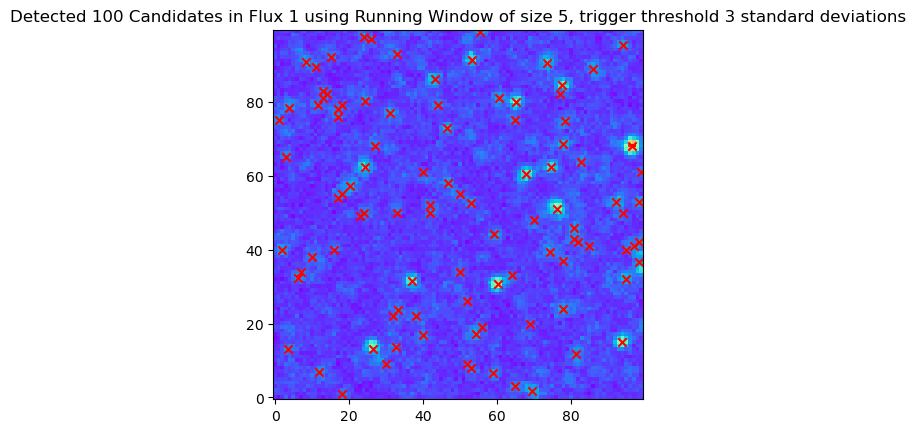

In [120]:
size=5
thresh=3
window=runningwindow(simulated_image1, "Flux 1", size, thresh)
plt.imshow(simulated_image1, cmap='rainbow', origin='lower')
positions = np.array(window)

x = positions[:, 1]  
y = positions[:, 0]  
plt.scatter(x,y, marker='x', color='red')
plt.title(f"Detected {len(positions)} Candidates in Flux 1 using Running Window of size {size}, trigger threshold {thresh} standard deviations")



Text(0.5, 1.0, 'Detected 245 Candidates in Flux 1 using Running Window of size 5, trigger threshold 1.5 standard deviations')

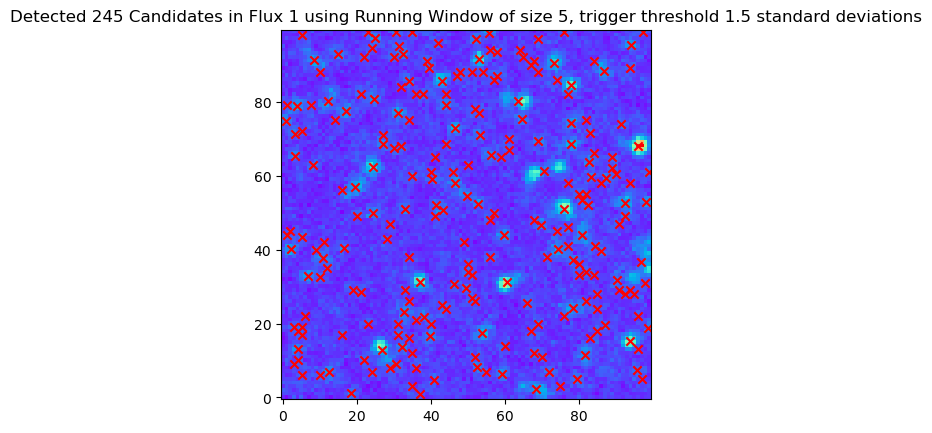

In [121]:
thresh=1.5
size=5
window2=runningwindow(simulated_image1, "Flux 1", size, thresh)
plt.imshow(simulated_image1, cmap='rainbow', origin='lower')
positions = np.array(window2)

x = positions[:, 1]  
y = positions[:, 0]  
plt.scatter(x,y, marker='x', color='red')
plt.title(f"Detected {len(positions)} Candidates in Flux 1 using Running Window of size {size}, trigger threshold {thresh} standard deviations")

Text(0.5, 1.0, 'Detected 197 Candidates in Flux 1 using Running Window of size 10, trigger threshold 3 standard deviations')

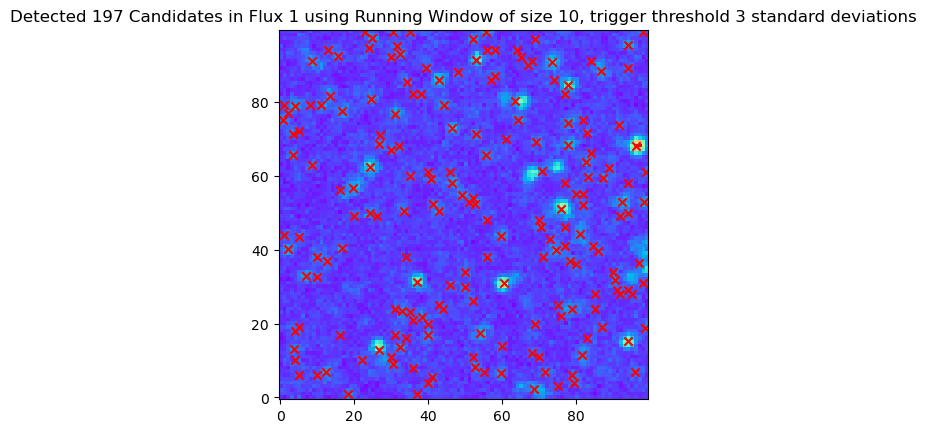

In [122]:
thresh=3
size=10
window3=runningwindow(simulated_image1, "Flux 1", size, thresh)
plt.imshow(simulated_image1, cmap='rainbow', origin='lower')
positions = np.array(window3)

x = positions[:, 1]  
y = positions[:, 0]  
plt.scatter(x,y, marker='x', color='red')
plt.title(f"Detected {len(positions)} Candidates in Flux 1 using Running Window of size {size}, trigger threshold {thresh} standard deviations")

[[ 1.81630693 69.54828023]
 [13.31294114 26.5770434 ]
 [15.14677383 93.8484204 ]
 [17.50131234 54.49081365]
 [24.         78.        ]
 [30.90320182 60.28742274]
 [31.46015609 36.88498777]
 [32.5        94.99158249]
 [37.13173487 98.29545415]
 [40.          2.        ]
 [40.         74.        ]
 [51.11399445 76.11318386]
 [52.80041785 92.60082519]
 [53.         99.        ]
 [57.01109885 20.01263087]
 [60.38250685 67.94248099]
 [62.44914727 24.14477997]
 [62.249181   74.6629058 ]
 [68.01233355 96.63297356]
 [68.49882978 78.00261322]
 [73.         46.50194212]
 [77.         31.        ]
 [79.9545595  64.0764726 ]
 [79.          4.        ]
 [84.50287625 77.72976431]
 [85.8710604  42.86862122]
 [90.5203533  73.51417654]
 [89.         86.        ]
 [91.33995816 53.12133891]
 [91.          8.49994212]
 [99.         55.5026455 ]]


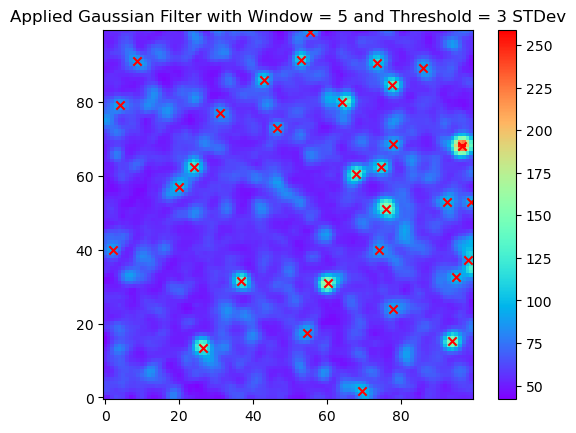

In [123]:
from scipy.ndimage import gaussian_filter, laplace

#Apply a filter over the data

def matchedfilter(image, background=50, type=1):
    # Mask out the background
    mask = image != background
    
    if type == 1:
        # Apply Gaussian filter
        filtered_data = gaussian_filter(image * mask, sigma=1)
        filtered_mask = gaussian_filter(mask.astype(float), sigma=1)
    elif type == 2:
        # Apply Laplacian filter
        filtered_data = laplace(image * mask)
        filtered_mask = laplace(mask.astype(float))
    else:
        raise ValueError("Type must be 1 (Gaussian) or 2 (Laplacian)")
    
    # Normalize to correct for masked regions
    normalized_image = filtered_data / np.maximum(filtered_mask, 1e-8)
    
    return normalized_image
test=matchedfilter(simulated_image1)
candidate_positions_filter_1 = runningwindow(test, "Flux 1", 5, 3, False)

positions = np.array(candidate_positions_filter_1)

x_1 = positions[:, 1]  
y_1 = positions[:, 0]  



print(positions)
plt.imshow(test, cmap="rainbow", origin="lower")
plt.colorbar()
plt.title("Applied Gaussian Filter with Window = 5 and Threshold = 3 STDev")
plt.scatter(x_1, y_1, marker='x', color='red')
plt.show()
#plt.title("REPLACE")

[[ 0.  4.]
 [ 0. 13.]
 [ 0. 17.]
 ...
 [99. 70.]
 [99. 73.]
 [99. 94.]]


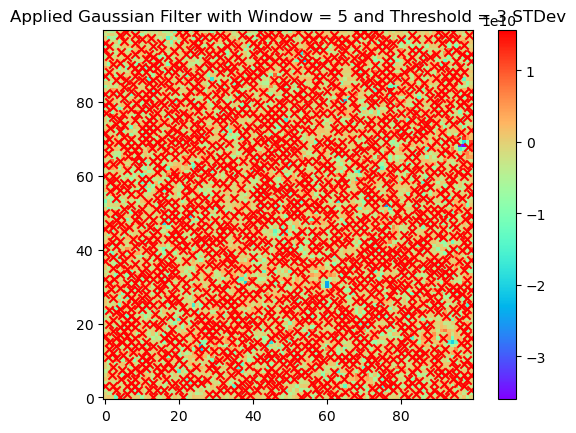

In [124]:
#Matched Filter
filter2=matchedfilter(simulated_image1, background=50, type=2)

candidate_positions_filter_2 = runningwindow(filter2, "Flux 1", 5, 3, False)

positions = np.array(candidate_positions_filter_2)

x_2 = positions[:, 1]  
y_2 = positions[:, 0]  



print(positions)
plt.imshow(filter2, cmap="rainbow", origin="lower")
plt.colorbar()
plt.title("Applied Gaussian Filter with Window = 5 and Threshold = 3 STDev")
plt.scatter(x_2, y_2, marker='x', color='red')
plt.show()

In [125]:
matchedfilter(simulated_image1, background=50, type=2)

array([[ 1.00000000e+08,  1.00000000e+09,  5.80000000e+01, ...,
         1.40000000e+09, -5.70000000e+09, -3.00000000e+08],
       [-4.00000000e+08, -3.50000000e+09, -6.00000000e+09, ...,
        -3.30000000e+09,  5.70000000e+01, -5.20000000e+09],
       [-3.50000000e+09, -5.00000000e+08, -7.00000000e+08, ...,
        -1.50000000e+09, -9.90000000e+09,  2.20000000e+09],
       ...,
       [ 7.00000000e+08, -1.13000000e+10, -5.00000000e+09, ...,
         8.00000000e+08,  1.10000000e+09, -1.20000000e+09],
       [-3.70000000e+09,  5.60000000e+01,  5.23333333e+01, ...,
        -3.60000000e+09,  3.00000000e+09,  2.70000000e+09],
       [-1.00000000e+09, -4.90000000e+09, -5.30000000e+09, ...,
        -1.20000000e+09, -4.00000000e+09, -2.00000000e+08]])

In [230]:
import numpy as np
from scipy.optimize import least_squares

def gaussian_psf(xy, x0, y0, sigma):
    x, y = xy
    return np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * sigma**2))

def wls_single_source_fit(image, x0, y0, sigma=4, size=7):

    half_size = size // 2
    y0_int, x0_int = int(round(y0)), int(round(x0))

    patch = image[y0_int - half_size:y0_int + half_size + 1,
                  x0_int - half_size:x0_int + half_size + 1]
    
    ny, nx = patch.shape
    y_indices, x_indices = np.mgrid[0:ny, 0:nx]
    x_indices = x_indices + x0_int - half_size
    y_indices = y_indices + y0_int - half_size

    def model(params):
        x_c, y_c, flux = params
        psf_vals = gaussian_psf((x_indices, y_indices), x_c, y_c, sigma)
        return flux * psf_vals

    def residuals(params):
        return (patch - model(params)).ravel()  

    init_params = [x0, y0, np.sum(patch)]
    result = least_squares(residuals, init_params)

    return result.x  


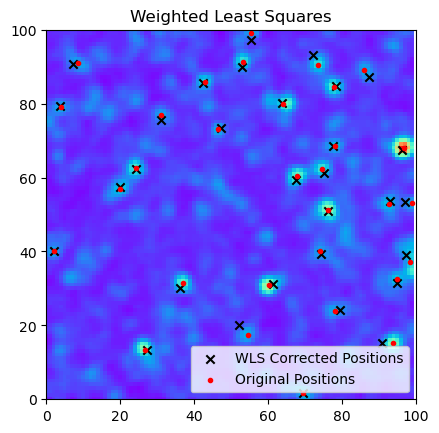

In [231]:
refined_sources = []

for y_peak, x_peak in candidate_positions_filter_1:
    x_refined, y_refined, flux = wls_single_source_fit(simulated_image1, x_peak, y_peak)
    refined_sources.append((x_refined, y_refined, flux))

refined_sources = np.array(refined_sources)
plt.imshow(test, cmap='rainbow', origin='lower')
plt.scatter(refined_sources[:, 0], refined_sources[:, 1], marker='x', color='black', label="WLS Corrected Positions")
plt.scatter(x_1, y_1, label="Original Positions", marker='.', color='red')
plt.xlim(0,100)
plt.ylim(0,100)
#matchedfilter(simulated_image1)
plt.title("Weighted Least Squares")
plt.legend()

In [128]:
print(refined_sources)

[[ 69.54828023   1.81630693   0.        ]
 [ 26.49905266  13.6018674  242.86505333]
 [ 93.90114282  15.07619224 255.30512407]
 [ 54.17931019  17.63431446 172.17062162]
 [ 77.99347922  23.99697753 166.19630482]
 [ 60.13230899  30.78014637 281.61660856]
 [ 36.97508526  31.35427359 223.45104616]
 [ 95.04263664  32.35136389 182.37072564]
 [ 97.98934607  36.26925495 174.23566349]
 [  2.          40.           0.        ]
 [ 74.19989881  39.83917616 165.97025264]
 [ 76.20415017  51.25059368 263.98982143]
 [ 92.75739965  52.90167728 178.75464068]
 [ 97.90170542  52.86761308 140.19022507]
 [ 20.07446846  57.10253151 184.73443368]
 [ 67.93136225  60.38916443 235.05178704]
 [ 24.07212736  62.27530322 212.95596699]
 [ 74.69860146  62.22383851 206.09192182]
 [ 96.56027858  67.9991768  393.9741876 ]
 [ 78.00731646  68.33570135 174.10439333]
 [ 46.6770272   72.81509222 159.9397272 ]
 [ 31.24493346  76.87209465 162.56912907]
 [ 64.81043641  79.97001889 226.57780709]
 [  3.87527883  78.79741998 164.90

/var/folders/bw/ct2htdbd5b19nyr7n1pycqyc0000gw/T/ipykernel_44561/3201788340.py:16: RuntimeWarning: overflow encountered in exp
  accept_prob = np.exp(prop_log_like - current_log_like)


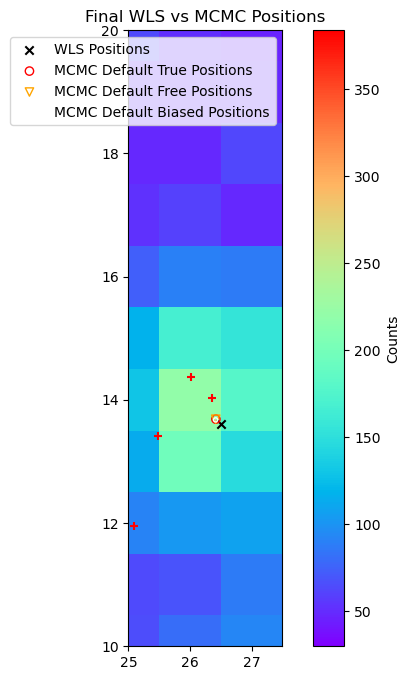

In [158]:
from itertools import chain
def log_likelihood_gaussian(params, data, xy, sigma_psf, noise_sigma=1.0):
    x0, y0, flux = params
    model = flux * gaussian_psf(xy, x0, y0, sigma_psf)
    residual = data - model
    return -0.5 * np.sum((residual / noise_sigma)**2)

def metropolis_hastings(log_likelihood, init_params, data, xy, sigma_psf, n_steps=10000, step_sizes=(0.2, 0.2, 5)):
    chain = [init_params]
    current_log_like = log_likelihood(init_params, data, xy, sigma_psf)

    for _ in range(n_steps):
        proposal = [p + np.random.normal(scale=s) for p, s in zip(chain[-1], step_sizes)]
        prop_log_like = log_likelihood(proposal, data, xy, sigma_psf)

        accept_prob = np.exp(prop_log_like - current_log_like)
        if np.random.rand() < accept_prob:
            chain.append(proposal)
            current_log_like = prop_log_like
        else:
            chain.append(chain[-1])

    return np.array(chain)

def MCMCimplement(sources, simulated_image, patch_size=11, sigma_psf=1.5):
    
    half_size = patch_size // 2
    fwhm = 2.355 * sigma_psf
    bias_offset = 0.1 * fwhm

    mcmc_results_true = []
    mcmc_results_free = []
    mcmc_results_biased = []
    chain_true=[]
    chain_free=[]
    chain_biased=[]

    for x_true, y_true, flux_true in sources:
        x_int = int(round(x_true))
        y_int = int(round(y_true))

        if (x_int - half_size >= 0) and (x_int + half_size < simulated_image.shape[1]) and (y_int - half_size >= 0) and (y_int + half_size < simulated_image.shape[0]):
            patch = simulated_image[y_int - half_size:y_int + half_size + 1, x_int - half_size:x_int + half_size + 1]

            ny, nx = patch.shape
            y_indices, x_indices = np.mgrid[0:ny, 0:nx]
            x_indices = x_indices + x_int - half_size
            y_indices = y_indices + y_int - half_size

            xy = (x_indices, y_indices)

            init_params_true = [x_true, y_true, flux_true]
            samples_true = metropolis_hastings(log_likelihood_gaussian, init_params_true, patch, xy, sigma_psf, n_steps=3000)
            mean_true = np.mean(samples_true, axis=0)
            mcmc_results_true.append(mean_true)
            chain_true.append(samples_true)

            init_params_free = [
                x_true + np.random.uniform(-1, 1),
                y_true + np.random.uniform(-1, 1),
                flux_true
            ]
            samples_free = metropolis_hastings(log_likelihood_gaussian, init_params_free, patch, xy, sigma_psf, n_steps=3000)
            mean_free = np.mean(samples_free, axis=0)
            mcmc_results_free.append(mean_free)
            chain_free.append(samples_free)

            init_params_biased = [
                x_true + bias_offset,
                y_true + bias_offset,
                flux_true
            ]
            samples_biased = metropolis_hastings(log_likelihood_gaussian, init_params_biased, patch, xy, sigma_psf, n_steps=3000)
            mean_biased = np.mean(samples_biased, axis=0)
            mcmc_results_biased.append(mean_biased)
            chain_biased.append(samples_biased)

    mcmc_results_true = np.array(mcmc_results_true)
    mcmc_results_free = np.array(mcmc_results_free)
    mcmc_results_biased = np.array(mcmc_results_biased)

    return mcmc_results_true, mcmc_results_free, mcmc_results_biased, chain_true, chain_free, chain_biased
mcmc_results_true, mcmc_results_free, mcmc_results_biased, chain_true, chain_free, chain_biased = MCMCimplement(refined_sources, simulated_image1)

plt.figure(figsize=(8,8))
plt.imshow(simulated_image1, origin='lower', cmap='rainbow')
plt.colorbar(label='Counts')

plt.scatter(refined_sources[:,0], refined_sources[:,1], marker='x', color='black', label='WLS Positions')
plt.scatter(mcmc_results_true[:,0], mcmc_results_true[:,1], marker='o', facecolors='none', edgecolors='red', label='MCMC Default True Positions')
plt.scatter(mcmc_results_free[:,0], mcmc_results_free[:,1], marker='v', facecolors='none', edgecolors='orange', label='MCMC Default Free Positions')
plt.scatter(mcmc_results_biased[:,0], mcmc_results_biased[:,1], marker='.', facecolors='none', edgecolors='white', label='MCMC Default Biased Positions')

plt.title('Final WLS vs MCMC Positions')
plt.legend()

plt.scatter(xcoord, ycoord, marker='+', color='red')
plt.xlim(25, 27.5)
plt.ylim(10, 20)
plt.show()


In [159]:
def plot_markov_chain(samples, title_prefix=""):

    fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

    axes[0].plot(samples[:, 0], lw=0.5)
    axes[0].set_ylabel('x0')
    axes[0].set_title(f'{title_prefix} Markov Chain for x0')

    axes[1].plot(samples[:, 1], lw=0.5)
    axes[1].set_ylabel('y0')
    axes[1].set_title(f'{title_prefix} Markov Chain for y0')

    axes[2].plot(samples[:, 2], lw=0.5)
    axes[2].set_ylabel('flux')
    axes[2].set_title(f'{title_prefix} Markov Chain for Flux')
    axes[2].set_xlabel('Step number')

    plt.tight_layout()
    plt.show()

print(mcmc_results_true[0])
print(mcmc_results_free[0])
print(mcmc_results_biased[0])

[ 26.41963308  13.68710086 248.69076753]
[ 26.41703     13.68606792 247.52000608]
[ 26.41521315  13.67588108 248.67189627]


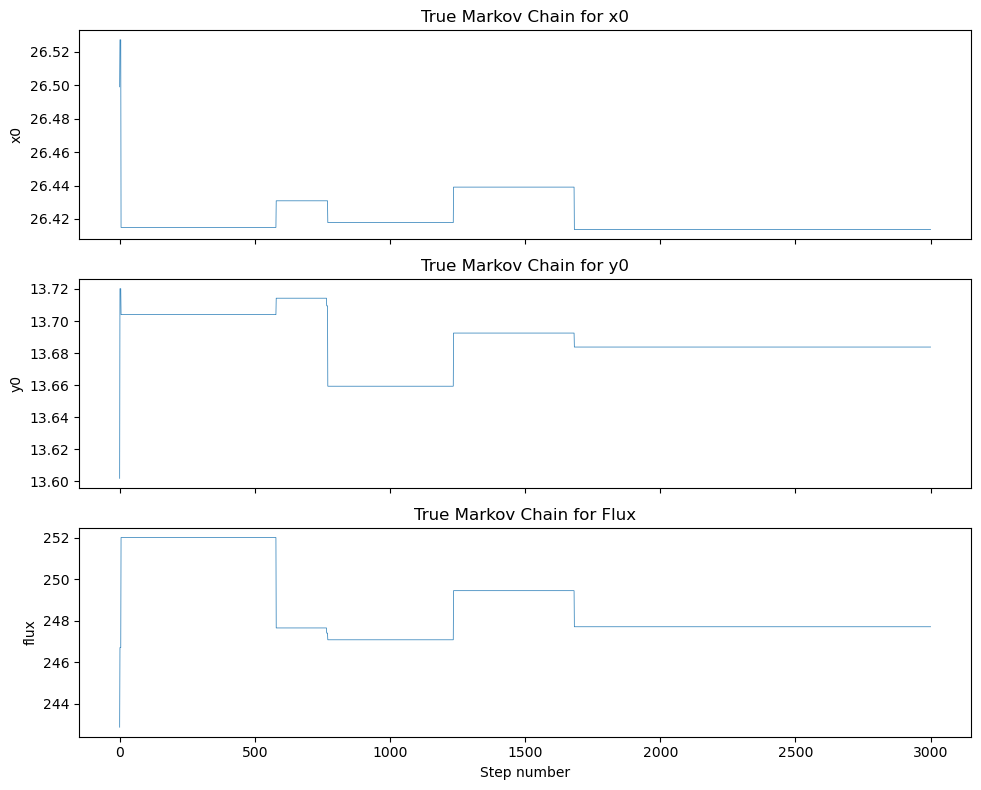

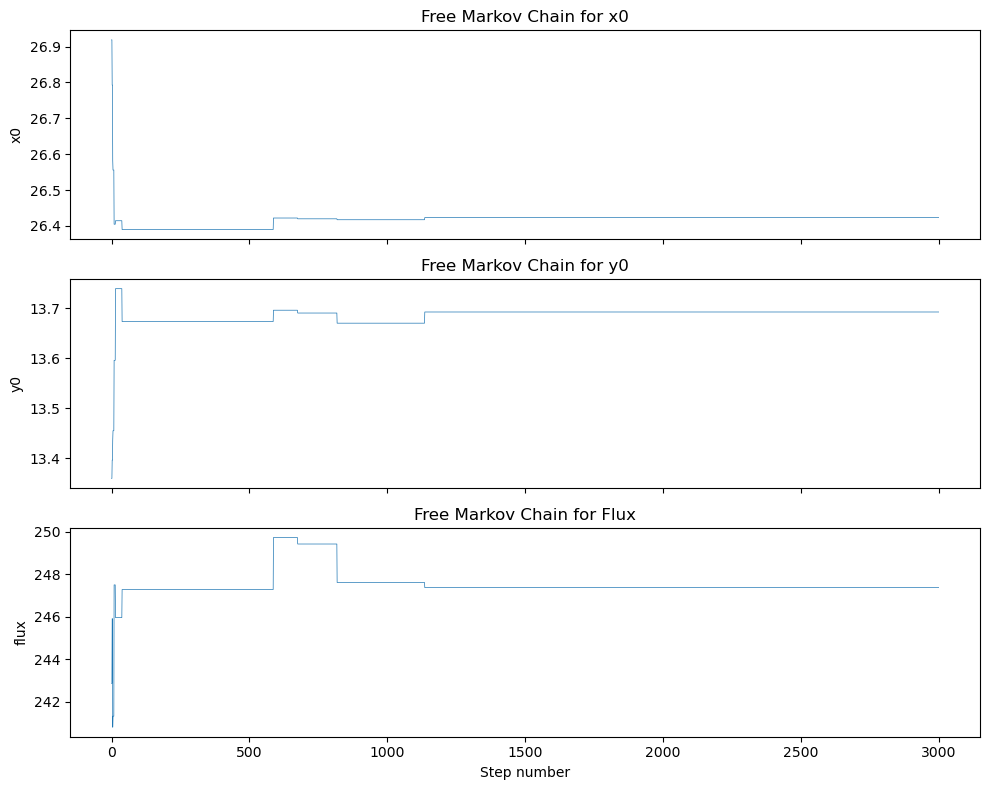

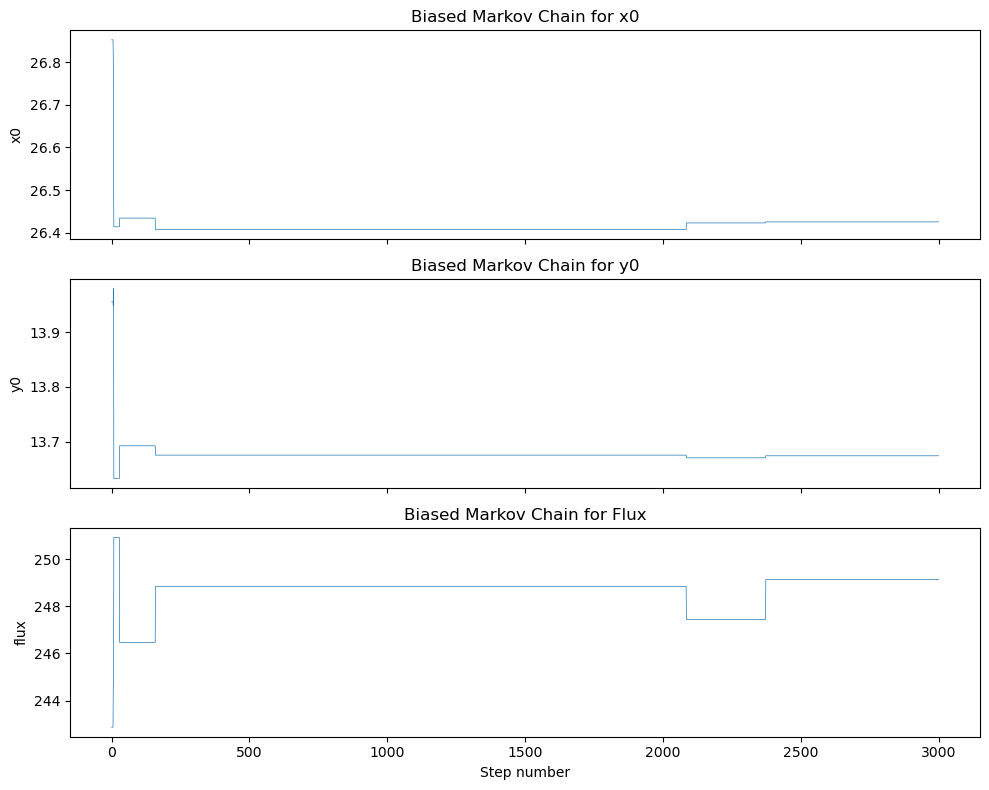

In [160]:
plot_markov_chain(chain_true[0], title_prefix="True")
plot_markov_chain(chain_free[0], title_prefix="Free")
plot_markov_chain(chain_biased[0], title_prefix="Biased")

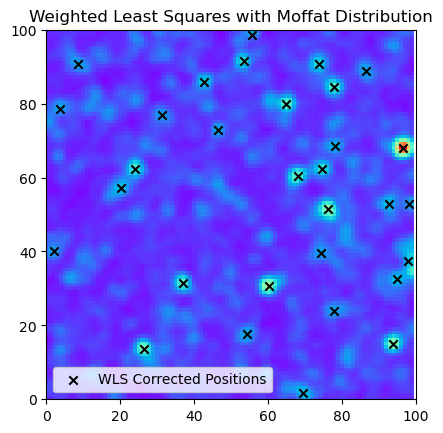

In [162]:
#Moffat Tail
def moffat_psf(xy, x0, y0, alpha=2.5, beta=1.5):
    x, y = xy
    r2 = (x - x0)**2 + (y - y0)**2
    return (1 + (r2 / alpha**2))**(-beta)
refined_sources = []
def wls_single_source_fit_moffat(image, x0, y0, alpha=2.5, beta=1.5, size=7):
    half_size = size // 2
    sigma=1.5
    y0_int, x0_int = int(round(y0)), int(round(x0))
    patch = image[y0_int - half_size:y0_int + half_size + 1,
                  x0_int - half_size:x0_int + half_size + 1]

    ny, nx = patch.shape
    y_indices, x_indices = np.mgrid[0:ny, 0:nx]
    x_indices = x_indices + x0_int - half_size
    y_indices = y_indices + y0_int - half_size

    def model(params):
        x_c, y_c, flux = params
        psf_vals = moffat_psf((x_indices, y_indices), x_c, y_c, sigma)
        return flux * psf_vals

    def residuals(params):
        return (patch - model(params)).ravel()  # WLS: all weights 1 for now

    init_params = [x0, y0, np.sum(patch)]
    result = least_squares(residuals, init_params)

    return result.x  # refined x, y, flux


for y_peak, x_peak in candidate_positions_filter_1:
    x_refined, y_refined, flux = wls_single_source_fit_moffat(simulated_image1, x_peak, y_peak)
    refined_sources.append((x_refined, y_refined, flux))

refined_sources = np.array(refined_sources)
plt.scatter(refined_sources[:, 0], refined_sources[:, 1], marker='x', color='black', label="WLS Corrected Positions")
plt.imshow(test, cmap='rainbow', origin='lower')
plt.xlim(0,100)
plt.ylim(0,100)
#matchedfilter(simulated_image1)
plt.title("Weighted Least Squares with Moffat Distribution")
plt.legend()




/var/folders/bw/ct2htdbd5b19nyr7n1pycqyc0000gw/T/ipykernel_44561/1944790072.py:37: RuntimeWarning: overflow encountered in exp
  accept_prob = np.exp(prop_log_like - current_log_like)


[[ 26.41963308  13.68710086 248.69076753]
 [ 93.88608913  15.0838338  259.49016647]
 [ 54.22419052  17.50459641 176.01700706]
 [ 78.03682931  24.00340199 169.50302367]
 [ 60.1643958   30.76579773 284.87564839]
 [ 36.96227426  31.40691756 227.57539296]
 [ 74.35069663  39.77777179 170.3529613 ]
 [ 76.22499661  51.28190984 268.13335774]
 [ 92.65726177  52.81767127 183.84119746]
 [ 20.167236    57.20343311 188.26824408]
 [ 67.94135408  60.45900783 239.67204269]
 [ 24.06140598  62.33810912 217.17450709]
 [ 74.57089926  62.28398896 211.0762005 ]
 [ 77.98360013  68.45713782 178.79217837]
 [ 46.58169897  72.74771529 164.05327867]
 [ 31.34781195  76.77784444 166.62872988]
 [ 64.97071097  79.93764178 232.67219149]
 [ 77.80265244  84.53000493 226.96215758]
 [ 42.82338202  85.80595681 189.05228412]
 [ 73.61511131  90.66656886 203.54799764]
 [ 86.45774575  88.68293126 171.13185191]
 [ 53.25320063  91.39567568 201.64233214]
 [  8.6797624   90.75290698 171.03798955]]
[array([ 26.42614986,  13.6193590

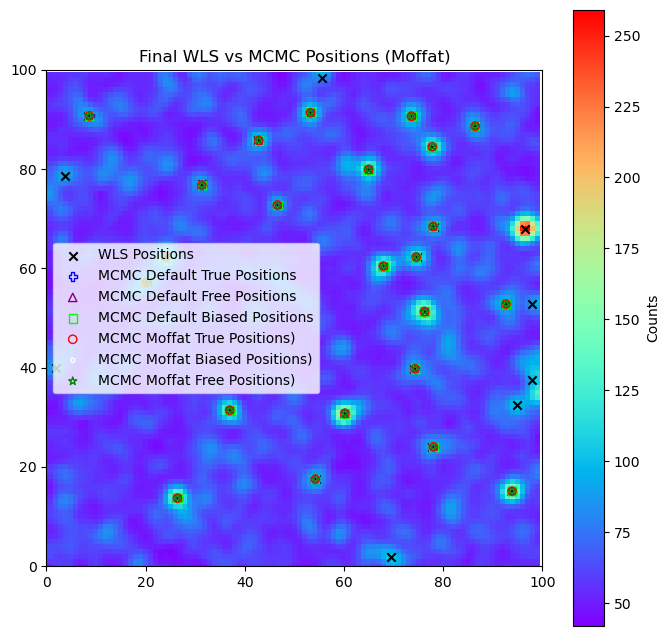

In [167]:
# Assume your functions are defined:
# - moffat_psf
# - log_likelihood_moffat
# - metropolis_hastings_moffat
def log_likelihood_moffat(params, data, xy, alpha, beta, noise_sigma=1.0):

    x0, y0, flux = params
    model = flux * moffat_psf(xy, x0, y0, alpha, beta)
    residual = data - model
    return -0.5 * np.sum((residual / noise_sigma)**2)

def metropolis_hastings_moffat(log_likelihood, init_params, data, xy, alpha, beta, n_steps=5000, step_sizes=(0.2, 0.2, 5)):

    chain = [init_params]
    current_log_like = log_likelihood(init_params, data, xy, alpha, beta)

    for _ in range(n_steps):
        # Propose a new step
        proposal = [p + np.random.normal(scale=s) for p, s in zip(chain[-1], step_sizes)]
        prop_log_like = log_likelihood(proposal, data, xy, alpha, beta)

        # Metropolis acceptance
        accept_prob = np.exp(prop_log_like - current_log_like)
        if np.random.rand() < accept_prob:
            chain.append(proposal)
            current_log_like = prop_log_like
        else:
            chain.append(chain[-1])

    return np.array(chain)
alpha_psf = 2.5
beta_psf = 1.5

patch_size = 11
half_size = patch_size // 2
fwhm = 2.355 * (alpha_psf)  
bias_offset = 0.1 * fwhm

mcmc_results_true_Moffat = []
mcmc_results_free_Moffat = []
mcmc_results_biased_Moffat = []

for x_true, y_true, flux_true in refined_sources:
    x_int = int(round(x_true))
    y_int = int(round(y_true))

    if (x_int - half_size >= 0) and (x_int + half_size < grid_size) and (y_int - half_size >= 0) and (y_int + half_size < grid_size):
        patch = simulated_image1[y_int - half_size:y_int + half_size + 1, x_int - half_size:x_int + half_size + 1]

        ny, nx = patch.shape
        y_indices, x_indices = np.mgrid[0:ny, 0:nx]
        x_indices = x_indices + x_int - half_size
        y_indices = y_indices + y_int - half_size

        xy = (x_indices, y_indices)

        init_params_true = [x_true, y_true, flux_true]
        samples_true = metropolis_hastings_moffat(log_likelihood_moffat, init_params_true, patch, xy, alpha_psf, beta_psf, n_steps=3000)
        mean_true = np.mean(samples_true, axis=0)
        mcmc_results_true_Moffat.append(mean_true)

        init_params_free = [
            x_true + np.random.uniform(-1, 1),
            y_true + np.random.uniform(-1, 1),
            flux_true
        ]
        samples_free = metropolis_hastings_moffat(log_likelihood_moffat, init_params_free, patch, xy, alpha_psf, beta_psf, n_steps=3000)
        mean_free = np.mean(samples_free, axis=0)
        mcmc_results_free_Moffat.append(mean_free)

        init_params_biased = [
            x_true + bias_offset,
            y_true + bias_offset,
            flux_true
        ]
        samples_biased = metropolis_hastings_moffat(log_likelihood_moffat, init_params_biased, patch, xy, alpha_psf, beta_psf, n_steps=3000)
        mean_biased = np.mean(samples_biased, axis=0)
        mcmc_results_biased_Moffat.append(mean_biased)

print(mcmc_results_true)
print(mcmc_results_true_Moffat)


mcmc_results_true_Moffat = np.array(mcmc_results_true)
mcmc_results_free_Moffat = np.array(mcmc_results_free)
mcmc_results_biased_Moffat = np.array(mcmc_results_biased)
plt.figure(figsize=(8,8))
plt.imshow(test, origin='lower', cmap='rainbow')
plt.colorbar(label='Counts')

plt.scatter(refined_sources[:,0], refined_sources[:,1], marker='x', color='black', label='WLS Positions')

plt.scatter(mcmc_results_true[:,0], mcmc_results_true[:,1], marker='P', facecolors='none', edgecolors='blue', label='MCMC Default True Positions')
plt.scatter(mcmc_results_free[:,0], mcmc_results_free[:,1], marker='^', facecolors='none', edgecolors='purple', label='MCMC Default Free Positions')
plt.scatter(mcmc_results_biased[:,0], mcmc_results_biased[:,1], marker=',', facecolors='none', edgecolors='lime', label='MCMC Default Biased Positions')
plt.scatter(mcmc_results_true_Moffat[:,0], mcmc_results_true_Moffat[:,1], marker='o', facecolors='none', edgecolors='red', label='MCMC Moffat True Positions)')
plt.scatter(mcmc_results_biased_Moffat[:,0], mcmc_results_biased_Moffat[:,1], marker='.', facecolors='none', edgecolors='white', label='MCMC Moffat Biased Positions)')
plt.scatter(mcmc_results_free_Moffat[:,0], mcmc_results_free_Moffat[:,1], marker='*', facecolors='none', edgecolors='green', label='MCMC Moffat Free Positions)')
plt.title('Final WLS vs MCMC Positions (Moffat)')
plt.legend()
plt.xlim(0, grid_size)
plt.ylim(0, grid_size)
plt.show()


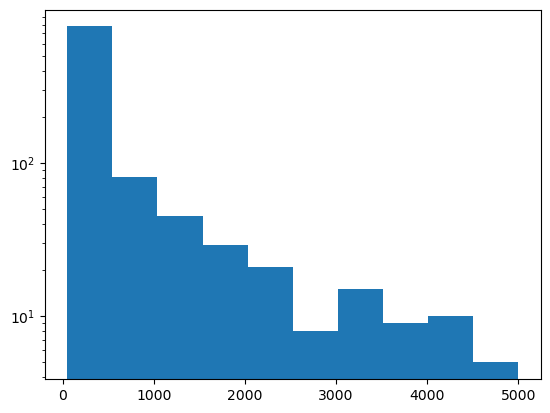

In [213]:
newflux=50*sample_flux(numsamples, alpha=1.5)
plt.hist(newflux)
#plt.xscale('log')
plt.yscale('log')

In [214]:
#Different Power Law index


background_level = 10
background = np.full((grid_size, grid_size), background_level)
print(background)

fwhm = 3
sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))

#Taken from HW3
source_counts = np.zeros((grid_size, grid_size))
for xc, yc, flux in zip(xcoord, ycoord, newflux):
    gaussx, gaussy = np.meshgrid(np.arange(grid_size), np.arange(grid_size))
    gaussian = np.exp(-((gaussx - xc) ** 2 + (gaussy - yc) ** 2) / (2 * sigma ** 2))
    gaussian /= gaussian.sum()

    source_counts += flux * gaussian
mean_counts = background + source_counts
simulated_image1_new_flux = np.random.poisson(mean_counts)

different_power_image=matchedfilter(simulated_image1_new_flux, background = 50)


[[10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 ...
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]]


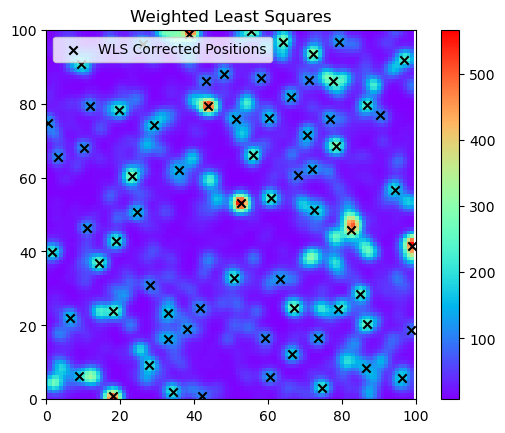

In [215]:
refined_sources_new_flux = []


for y_peak, x_peak in runningwindow(different_power_image):
    x_refined, y_refined, flux = wls_single_source_fit(simulated_image1_new_flux, x_peak, y_peak)
    refined_sources_new_flux.append((x_refined, y_refined, flux))
plt.imshow(different_power_image, cmap='rainbow', origin='lower')
plt.colorbar()
#plt.title('Simulated Image after Flux Cut')

refined_sources_new_flux = np.array(refined_sources_new_flux)
plt.scatter(refined_sources_new_flux[:, 0], refined_sources_new_flux[:, 1], marker='x', color='black', label="WLS Corrected Positions")
plt.xlim(0,100)
plt.ylim(0,100)
#matchedfilter(simulated_image1)
plt.title("Weighted Least Squares")
plt.legend()

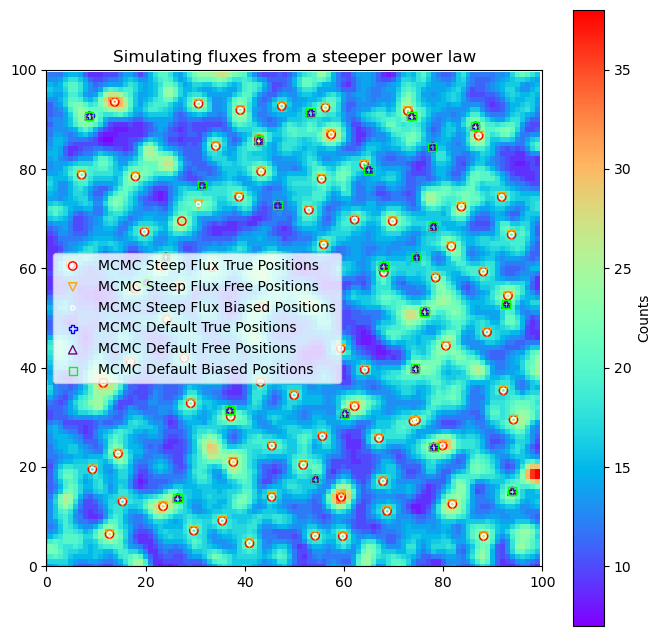

In [192]:
mcmc_results_true_new_flux, mcmc_results_free_new_flux, mcmc_results_biased_new_flux, _, _, _ = MCMCimplement(refined_sources_new_flux, simulated_image1_new_flux)

# Plot everything
plt.figure(figsize=(8,8))
plt.imshow(different_power_image, origin='lower', cmap='rainbow')
plt.colorbar(label='Counts')

#plt.scatter(refined_sources[:,0], refined_sources[:,1], marker='x', color='black', label='WLS Positions')
plt.scatter(mcmc_results_true_new_flux[:,0], mcmc_results_true_new_flux[:,1], marker='o', facecolors='none', edgecolors='red', label='MCMC Steep Flux True Positions')
plt.scatter(mcmc_results_free_new_flux[:,0], mcmc_results_free_new_flux[:,1], marker='v', facecolors='none', edgecolors='orange', label='MCMC Steep Flux Free Positions')
plt.scatter(mcmc_results_biased_new_flux[:,0], mcmc_results_biased_new_flux[:,1], marker='.', facecolors='none', edgecolors='white', label='MCMC Steep Flux Biased Positions')
plt.scatter(mcmc_results_true[:,0], mcmc_results_true[:,1], marker='P', facecolors='none', edgecolors='blue', label='MCMC Default True Positions')
plt.scatter(mcmc_results_free[:,0], mcmc_results_free[:,1], marker='^', facecolors='none', edgecolors='purple', label='MCMC Default Free Positions')
plt.scatter(mcmc_results_biased[:,0], mcmc_results_biased[:,1], marker=',', facecolors='none', edgecolors='lime', label='MCMC Default Biased Positions')
plt.title('Simulating fluxes from a steeper power law')
plt.legend()
plt.xlim(0, grid_size)
plt.ylim(0, grid_size)
plt.show()



[[10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 ...
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]]


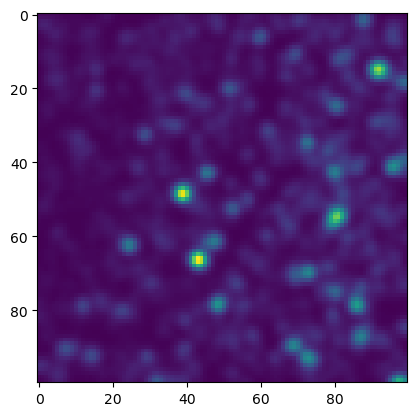

In [221]:
#Add east west gradient

fluxes = 50 * sample_flux(numsamples)

x_normalized = np.array(xcoord) / grid_size
gradient_factor = 1 + 2 * x_normalized
fluxes_gradient = fluxes * gradient_factor

background_level = 10
background = np.full((grid_size, grid_size), background_level)
print(background)

fwhm = 3
sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))

#Taken from HW3
source_counts = np.zeros((grid_size, grid_size))
for xc, yc, flux in zip(xcoord, ycoord, fluxes_gradient):
    gaussx, gaussy = np.meshgrid(np.arange(grid_size), np.arange(grid_size))
    gaussian = np.exp(-((gaussx - xc) ** 2 + (gaussy - yc) ** 2) / (2 * sigma ** 2))
    gaussian /= gaussian.sum()

    source_counts += flux * gaussian
mean_counts = background + source_counts
simulated_image1_gradient = np.random.poisson(mean_counts)

gradientimage=matchedfilter(simulated_image1_gradient, background = 50)
plt.imshow(gradientimage)

/var/folders/bw/ct2htdbd5b19nyr7n1pycqyc0000gw/T/ipykernel_44561/3201788340.py:16: RuntimeWarning: overflow encountered in exp
  accept_prob = np.exp(prop_log_like - current_log_like)


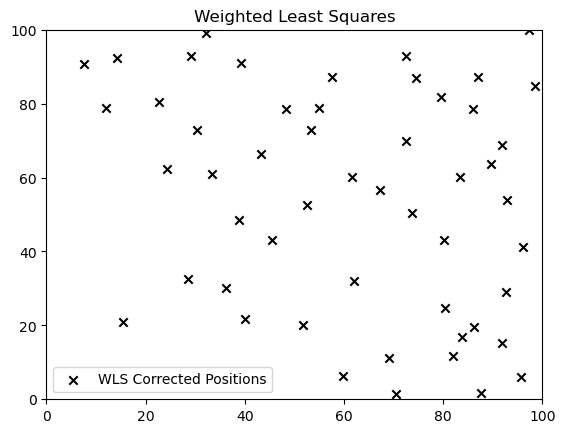

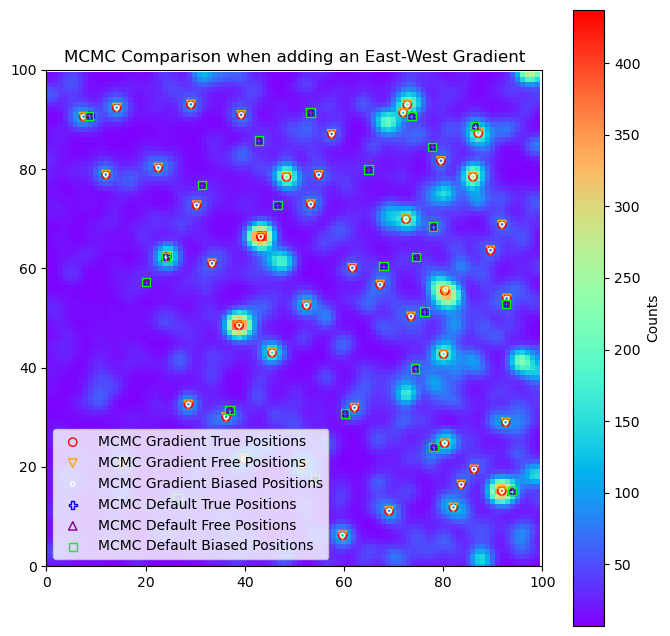

In [222]:
refined_sources_gradient = []


for y_peak, x_peak in runningwindow(gradientimage):
    x_refined, y_refined, flux = wls_single_source_fit(simulated_image1_gradient, x_peak, y_peak)
    refined_sources_gradient.append((x_refined, y_refined, flux))

refined_sources_gradient = np.array(refined_sources_gradient)
plt.scatter(refined_sources_gradient[:, 0], refined_sources_gradient[:, 1], marker='x', color='black', label="WLS Corrected Positions")
plt.xlim(0,100)
plt.ylim(0,100)
#matchedfilter(simulated_image1)
plt.title("Weighted Least Squares")
plt.legend()

mcmc_results_true_gradient, mcmc_results_free_gradient, mcmc_results_biased_gradient, _, _, _ = MCMCimplement(refined_sources_gradient, simulated_image1_gradient)

# Plot everything
plt.figure(figsize=(8,8))
plt.imshow(gradientimage, origin='lower', cmap='rainbow')
plt.colorbar(label='Counts')

#plt.scatter(refined_sources[:,0], refined_sources[:,1], marker='x', color='black', label='WLS Positions')
plt.scatter(mcmc_results_true_gradient[:,0], mcmc_results_true_gradient[:,1], marker='o', facecolors='none', edgecolors='red', label='MCMC Gradient True Positions')
plt.scatter(mcmc_results_free_gradient[:,0], mcmc_results_free_gradient[:,1], marker='v', facecolors='none', edgecolors='orange', label='MCMC Gradient Free Positions')
plt.scatter(mcmc_results_biased_gradient[:,0], mcmc_results_biased_gradient[:,1], marker='.', facecolors='none', edgecolors='white', label='MCMC Gradient Biased Positions')
plt.scatter(mcmc_results_true[:,0], mcmc_results_true[:,1], marker='P', facecolors='none', edgecolors='blue', label='MCMC Default True Positions')
plt.scatter(mcmc_results_free[:,0], mcmc_results_free[:,1], marker='^', facecolors='none', edgecolors='purple', label='MCMC Default Free Positions')
plt.scatter(mcmc_results_biased[:,0], mcmc_results_biased[:,1], marker=',', facecolors='none', edgecolors='lime', label='MCMC Default Biased Positions')
plt.title('MCMC Comparison when adding an East-West Gradient')
plt.legend()
plt.xlim(0, grid_size)
plt.ylim(0, grid_size)
plt.show()


[[50 50 50 ... 50 50 50]
 [50 50 50 ... 50 50 50]
 [50 50 50 ... 50 50 50]
 ...
 [50 50 50 ... 50 50 50]
 [50 50 50 ... 50 50 50]
 [50 50 50 ... 50 50 50]]


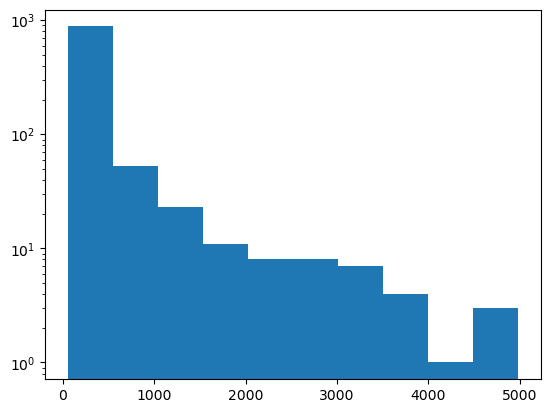

In [178]:
newflux1=50*sample_flux(numsamples//2, alpha=2.5)
newflux2=50*sample_flux(numsamples//2, alpha=1.5)
newflux=np.concatenate((newflux1, newflux2))
plt.hist(newflux)
plt.yscale('log')

two_source_image=simimage(xcoord, ycoord, newflux)
two_image=matchedfilter(two_source_image)

/var/folders/bw/ct2htdbd5b19nyr7n1pycqyc0000gw/T/ipykernel_44561/3201788340.py:16: RuntimeWarning: overflow encountered in exp
  accept_prob = np.exp(prop_log_like - current_log_like)


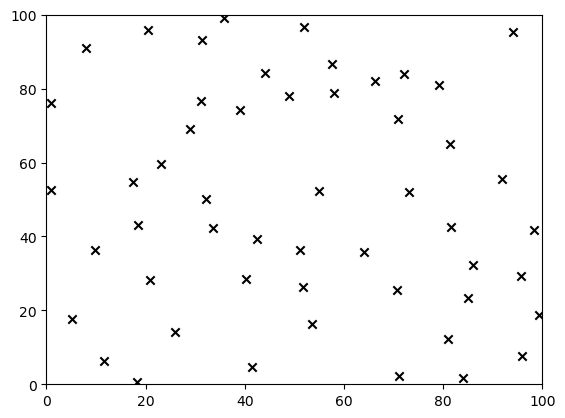

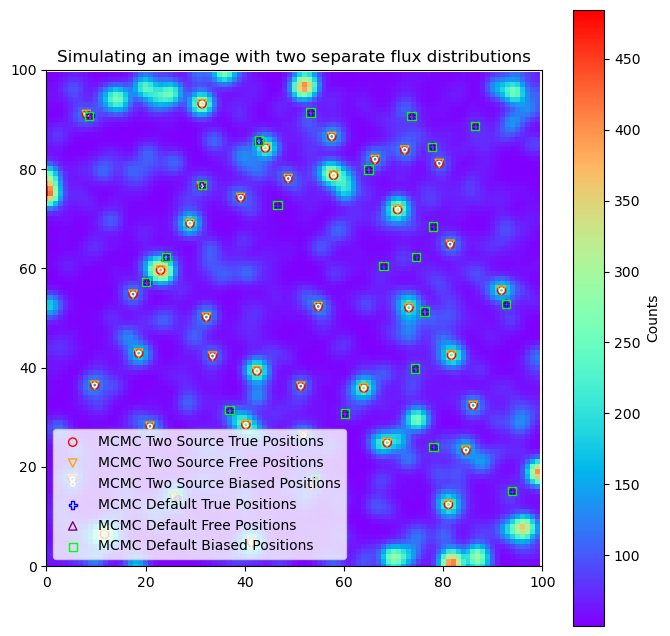

In [181]:
refined_sources_two_source = []

for y_peak, x_peak in runningwindow(two_image):
    x_refined, y_refined, flux = wls_single_source_fit(two_source_image, x_peak, y_peak)
    refined_sources_two_source.append((x_refined, y_refined, flux))

refined_sources_two_source = np.array(refined_sources_two_source)

plt.scatter(refined_sources_two_source[:, 0], refined_sources_two_source[:, 1], marker='x', color='black', label="WLS Corrected Positions")
plt.xlim(0,100)
plt.ylim(0,100)
#

mcmc_results_true_two_source, mcmc_results_free_two_source, mcmc_results_biased_two_source, _, _, _ = MCMCimplement(refined_sources_two_source, two_source_image)


plt.figure(figsize=(8,8))
plt.imshow(two_image, origin='lower', cmap='rainbow')
plt.colorbar(label='Counts')

#plt.scatter(refined_sources[:,0], refined_sources[:,1], marker='x', color='black', label='WLS Positions')
plt.scatter(mcmc_results_true_two_source[:,0], mcmc_results_true_two_source[:,1], marker='o', facecolors='none', edgecolors='red', label='MCMC Two Source True Positions')
plt.scatter(mcmc_results_free_two_source[:,0], mcmc_results_free_two_source[:,1], marker='v', facecolors='none', edgecolors='orange', label='MCMC Two Source Free Positions')
plt.scatter(mcmc_results_biased_two_source[:,0], mcmc_results_biased_two_source[:,1], marker='.', facecolors='none', edgecolors='white', label='MCMC Two Source Biased Positions')
plt.scatter(mcmc_results_true[:,0], mcmc_results_true[:,1], marker='P', facecolors='none', edgecolors='blue', label='MCMC Default True Positions')
plt.scatter(mcmc_results_free[:,0], mcmc_results_free[:,1], marker='^', facecolors='none', edgecolors='purple', label='MCMC Default Free Positions')
plt.scatter(mcmc_results_biased[:,0], mcmc_results_biased[:,1], marker=',', facecolors='none', edgecolors='lime', label='MCMC Default Biased Positions')
plt.title('Simulating an image with two separate flux distributions')
plt.legend()
plt.xlim(0, grid_size)
plt.ylim(0, grid_size)
plt.show()



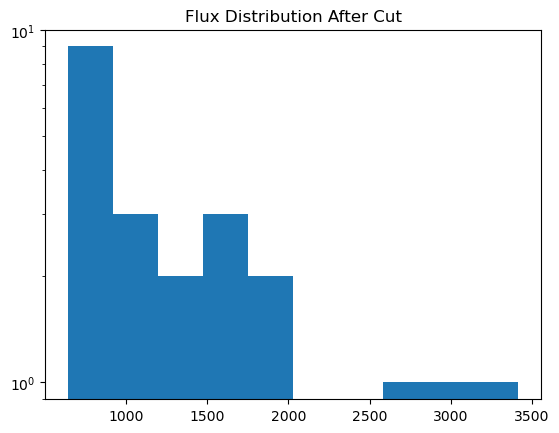

[[50 50 50 ... 50 50 50]
 [50 50 50 ... 50 50 50]
 [50 50 50 ... 50 50 50]
 ...
 [50 50 50 ... 50 50 50]
 [50 50 50 ... 50 50 50]
 [50 50 50 ... 50 50 50]]


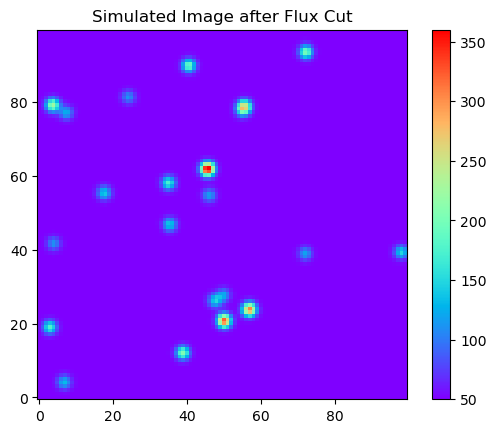

In [182]:
cut_flux = 50 * sample_flux(numsamples, alpha=2.5)
cut = 600
mask = cut_flux >= cut
cut_flux = cut_flux[mask]
xcoord_cut = np.array(xcoord)[mask]
ycoord_cut = np.array(ycoord)[mask]
plt.hist(cut_flux)
plt.yscale('log')
plt.title('Flux Distribution After Cut')
plt.show()

cut_image = simimage(xcoord_cut, ycoord_cut, cut_flux)

plt.imshow(cut_image, cmap='rainbow', origin='lower')
plt.colorbar()
plt.title('Simulated Image after Flux Cut')
plt.show()

image_cut=matchedfilter(cut_image, background= 100)



/var/folders/bw/ct2htdbd5b19nyr7n1pycqyc0000gw/T/ipykernel_44561/3201788340.py:16: RuntimeWarning: overflow encountered in exp
  accept_prob = np.exp(prop_log_like - current_log_like)


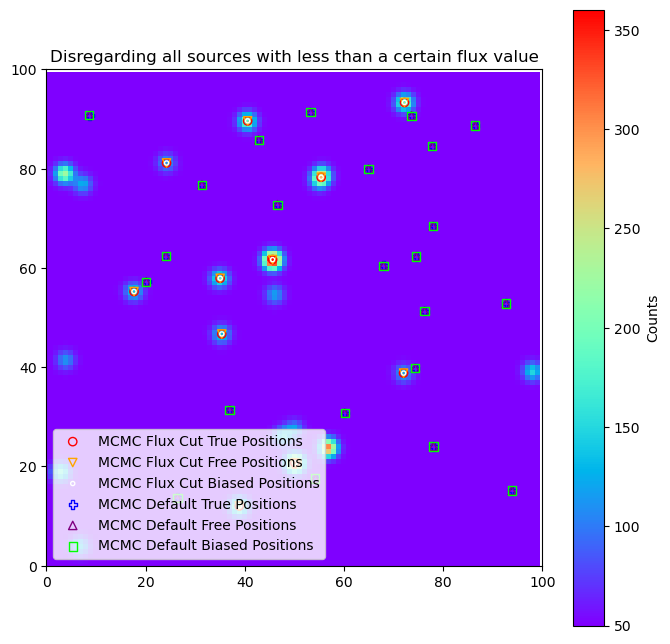

In [184]:
refined_sources_cut = []

for y_peak, x_peak in runningwindow(image_cut):
    x_refined, y_refined, flux = wls_single_source_fit(cut_image, x_peak, y_peak)
    refined_sources_cut.append((x_refined, y_refined, flux))

refined_sources_cut = np.array(refined_sources_cut)

mcmc_results_true_cut, mcmc_results_free_cut, mcmc_results_biased_cut, _, _, _ = MCMCimplement(refined_sources_cut, cut_image)


plt.figure(figsize=(8,8))
plt.imshow(cut_image, origin='lower', cmap='rainbow')
plt.colorbar(label='Counts')

#plt.scatter(refined_sources[:,0], refined_sources[:,1], marker='x', color='black', label='WLS Positions')
plt.scatter(mcmc_results_true_cut[:,0], mcmc_results_true_cut[:,1], marker='o', facecolors='none', edgecolors='red', label='MCMC Flux Cut True Positions')
plt.scatter(mcmc_results_free_cut[:,0], mcmc_results_free_cut[:,1], marker='v', facecolors='none', edgecolors='orange', label='MCMC Flux Cut Free Positions')
plt.scatter(mcmc_results_biased_cut[:,0], mcmc_results_biased_cut[:,1], marker='.', facecolors='none', edgecolors='white', label='MCMC Flux Cut Biased Positions')
plt.scatter(mcmc_results_true[:,0], mcmc_results_true[:,1], marker='P', facecolors='none', edgecolors='blue', label='MCMC Default True Positions')
plt.scatter(mcmc_results_free[:,0], mcmc_results_free[:,1], marker='^', facecolors='none', edgecolors='purple', label='MCMC Default Free Positions')
plt.scatter(mcmc_results_biased[:,0], mcmc_results_biased[:,1], marker=',', facecolors='none', edgecolors='lime', label='MCMC Default Biased Positions')
plt.title('Disregarding all sources with less than a certain flux value')
plt.legend()
plt.xlim(0, grid_size)
plt.ylim(0, grid_size)
plt.show()
